In [31]:
# Importing libraries 
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv
from pytube import extract, YouTube
load_dotenv()
api_key = os.getenv('API_KEY')

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import pandas as pd
from datetime import datetime
import plotly.express as px

from dotenv import load_dotenv
load_dotenv()

True

In [2]:

class YoutubeVideo:
    def __init__(self, link="https://www.youtube.com/watch?v=qT7S0BrFnRc&t=214s"):
        #initialize class object

        self.link = link
        self.link_id = extract.video_id(link)
    
    def get_link_id(self) -> str:
        #return the link id of the youtube video
        return self.link_id

    def download(self):
        youtube = YouTube(self.link)   
        youtube = youtube.streams.get_highest_resolution()
        try:
            youtube.download()
        except:
            print("An error has occurred")
        print("Download is completed successfully")

video=YoutubeVideo()




DEVELOPER_KEY = os.getenv('API_KEY')
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

def get_video_comments(service, **kwargs):
    comments, dates, likes = [], [], []
    results = service.commentThreads().list(**kwargs).execute()

    while results:
        for item in results['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            date = item['snippet']['topLevelComment']['snippet']['publishedAt']
            like = item['snippet']['topLevelComment']['snippet']['likeCount']

            comments.append(comment)
            dates.append(date)
            likes.append(like)

        # check if there are more comments
        if 'nextPageToken' in results:
            kwargs['pageToken'] = results['nextPageToken']
            results = service.commentThreads().list(**kwargs).execute()
        else:
            break

    return pd.DataFrame({'Comments': comments, 'Date': dates, 'Likes': likes})


comments_df = None

def create_df(yt_vid):
    global comments_df
    
    # Build the service
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)


    # Get the comments
    video_id = yt_vid.get_link_id() 
    comments_df = get_video_comments(youtube, part='snippet', videoId=video_id, textFormat='plainText')
    return comments_df





In [5]:
rodtang_and_stamp_doc = YoutubeVideo(link="https://youtu.be/dVezrYbTIrg?si=GnEIFJ-13VGUWqo6")
rodtang_and_stamp_doc_df = create_df(rodtang_and_stamp_doc)

ufc_biggest_failure_doc = YoutubeVideo(link="https://youtu.be/rLRwGvCMYO4?si=HaqrMLrCoJ6erpUE")
ufc_biggest_failure_doc_df = create_df(ufc_biggest_failure_doc)

chatri_one_doc = YoutubeVideo(link="https://youtu.be/6WtV3GmdQY4?si=6rQU9Xf8xUnwTeuO")
chatri_one_doc_df = create_df(chatri_one_doc)

In [4]:
rodtang_and_stamp_doc_df

,Comments,Date,Likes
0,Back from Youtube Hell! Thanks for waiting out...,2023-06-23T15:56:31Z,56
1,Watching this after angela lee retirement,2023-09-30T10:04:17Z,0
2,08:06 stamp was manufactured LMAO at that tin ...,2023-09-30T08:55:02Z,0
3,I WISH we had these opportunities in the west,2023-09-28T23:15:41Z,0
4,I would like to say you have a great talent fo...,2023-09-28T22:38:19Z,0
...,...,...,...
244,"Man, I love Muay Thai, both as a combat sport ...",2023-06-23T16:06:26Z,309
245,This is a much deeper and darker MMA video tha...,2023-06-23T15:58:30Z,12
246,I fell in love with muay thai but mma is where...,2023-06-23T15:58:29Z,7
247,"Damn, captivating!",2023-06-23T15:56:54Z,1


In [6]:
ufc_biggest_failure_doc_df

,Comments,Date,Likes
0,🌍 Thinking of grabbing tickets for the Live Re...,2023-01-16T09:02:44Z,66
1,the UFC is starting to become a joke. it start...,2023-09-29T06:01:54Z,0
2,Thanks!,2023-09-27T04:46:21Z,0
3,Dam once you start going down the rabbit hole ...,2023-09-27T04:44:13Z,0
4,"Dam this guy is a genius fighter, I came here ...",2023-09-27T04:40:25Z,0
...,...,...,...
903,The fight companion live was sultry. Thanks Ac...,2023-01-15T11:21:01Z,9
904,*Happy New Year!*\r\n*Eat Cannabis Everyday!*\...,2023-01-15T11:19:06Z,1
905,The next ufc desolation episode will be on Fra...,2023-01-15T07:28:15Z,636
906,Time to get the lotion ready 💦,2023-01-15T04:48:52Z,2


In [7]:
chatri_one_doc_df

,Comments,Date,Likes
0,I love it a true martial artist seeming to bas...,2023-09-30T18:09:50Z,0
1,"Love this guy, class all the way !!",2023-09-30T17:14:22Z,0
2,"They are selling fights, we are unleashing her...",2023-09-30T14:32:13Z,0
3,UFC is overrated.🤬,2023-09-30T03:53:16Z,0
4,Screw Dana 💩,2023-09-30T03:51:03Z,0
...,...,...,...
3155,Love your videos!,2023-05-27T12:00:28Z,0
3156,1st,2023-05-27T12:00:28Z,0
3157,Leeeeeet's goooooo!!!!,2023-05-27T12:00:26Z,0
3158,First,2023-05-27T12:00:25Z,1


In [ ]:
rodtang_and_stamp_doc_df.to_csv('rodtang_and_stamp_doc_comments.csv')
ufc_biggest_failure_doc_df.to_csv('ufc_biggest_failure_doc_comments.csv')
chatri_one_doc_df.to_csv('chatri_one_doc_comments.csv')

In [118]:
r_and_s_df = pd.read_csv('rodtang_and_stamp_doc_comments.csv', error_bad_lines=False)
ufc_failure_df = pd.read_csv('ufc_biggest_failure_doc_comments.csv', error_bad_lines=False)
chatri_one_df = pd.read_csv('chatri_one_doc_comments.csv', error_bad_lines=False)



c:\Users\Anthony Aleman\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [119]:
r_and_s_df.drop(columns=['Unnamed: 0'], inplace=True)
r_and_s_df.head()


,Comments,Date,Likes
0,Back from Youtube Hell! Thanks for waiting out...,2023-06-23T15:56:31Z,56
1,Watching this after angela lee retirement,2023-09-30T10:04:17Z,0
2,08:06 stamp was manufactured LMAO at that tin ...,2023-09-30T08:55:02Z,0
3,I WISH we had these opportunities in the west,2023-09-28T23:15:41Z,0
4,I would like to say you have a great talent fo...,2023-09-28T22:38:19Z,0


In [120]:
ufc_failure_df.drop(columns=['Unnamed: 0'], inplace=True)
ufc_failure_df.head()

,Comments,Date,Likes
0,🌍 Thinking of grabbing tickets for the Live Re...,2023-01-16T09:02:44Z,66
1,the UFC is starting to become a joke. it start...,2023-09-29T06:01:54Z,0
2,Thanks!,2023-09-27T04:46:21Z,0
3,Dam once you start going down the rabbit hole ...,2023-09-27T04:44:13Z,0
4,"Dam this guy is a genius fighter, I came here ...",2023-09-27T04:40:25Z,0


In [121]:
chatri_one_df.drop(columns=['Unnamed: 0'], inplace=True)
chatri_one_df.head()

,Comments,Date,Likes
0,I love it a true martial artist seeming to bas...,2023-09-30T18:09:50Z,0
1,"Love this guy, class all the way !!",2023-09-30T17:14:22Z,0
2,"They are selling fights, we are unleashing her...",2023-09-30T14:32:13Z,0
3,UFC is overrated.🤬,2023-09-30T03:53:16Z,0
4,Screw Dana 💩,2023-09-30T03:51:03Z,0


Rodtang and Stamp video

In [122]:
r_and_s_df.shape

(249, 3)

In [11]:
r_and_s_df.nunique()

Comments    248
Date        249
Likes        24
dtype: int64

In [15]:
r_and_s_df.Comments = r_and_s_df.Comments.astype(str)
r_and_s_df.Date = pd.to_datetime(r_and_s_df.Date)

r_and_s_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Comments  249 non-null    object             
 1   Date      249 non-null    datetime64[ns, UTC]
 2   Likes     249 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 6.0+ KB


Emojis

In [21]:
import emoji

emojis_str=''
for i in r_and_s_df['Comments']:
    emojis_list = [c for c in i if c in emoji.distinct_emoji_list(i)]
    for element in emojis_list:
        emojis_str = emojis_str + element

len(emojis_str)

69

In [24]:

result={}
for i in set(emojis_str):
    result[i]=emojis_str.count(i)

result.items()


dict_items([('😖', 1), ('😍', 4), ('😩', 1), ('🥺', 1), ('\U0001f979', 1), ('🙏', 1), ('😘', 3), ('😁', 1), ('🤤', 2), ('☝', 1), ('🔥', 4), ('😑', 1), ('💪', 2), ('💚', 1), ('🏆', 2), ('❤', 9), ('⭐', 1), ('\U0001fae1', 24), ('😂', 3), ('👍', 4), ('🥊', 2)])

In [27]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

values=[*final.values()]

In [29]:
emoji_df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})
emoji_df

,chars,num
0,😩,1
1,🥺,1
2,🥹,1
3,🙏,1
4,😁,1
5,☝,1
6,😑,1
7,💚,1
8,⭐,1
9,🤤,2


In [32]:
px.bar(data_frame = emoji_df, x='chars',
y='num', color = 'num', template = 'plotly_dark', 
       title = 'Count of each emoji')

Remove punctuation, numbers, & special char

In [34]:
r_and_s_df['Comments'] = r_and_s_df['Comments'].str.replace("[^a-zA-Z#]", " ")
r_and_s_df.head()

C:\Users\ANTHON~1\AppData\Local\Temp/ipykernel_13116/500376969.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Comments,Date,Likes
0,Back from Youtube Hell Thanks for waiting out...,2023-06-23 15:56:31+00:00,56
1,Watching this after angela lee retirement,2023-09-30 10:04:17+00:00,0
2,stamp was manufactured LMAO at that tin ...,2023-09-30 08:55:02+00:00,0
3,I WISH we had these opportunities in the west,2023-09-28 23:15:41+00:00,0
4,I would like to say you have a great talent fo...,2023-09-28 22:38:19+00:00,0


Remove StopWords

In [62]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['like', 'good', 'make', 'would', 'always', 'see', 'right', 'know', 'get', 'would', 'going', 'video'])

r_and_s_df['Comments'] = r_and_s_df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopwords)]))
r_and_s_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True
3,wish opportunities west,2023-09-28 23:15:41+00:00,0,"[wish, opportunities, west]",wish opportunities west,wish opportunities west,wish opportunities west,True
4,say great talent telling stories thank hard work,2023-09-28 22:38:19+00:00,0,"[say, great, talent, telling, stories, thank, ...",say great talent telling stories thank hard work,say great talent telling stories thank hard work,say great talent telling stories thank hard work,True


Change text to lowercase

In [63]:
r_and_s_df['Comments'] = r_and_s_df['Comments'].apply(lambda x:x.lower())
r_and_s_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True
3,wish opportunities west,2023-09-28 23:15:41+00:00,0,"[wish, opportunities, west]",wish opportunities west,wish opportunities west,wish opportunities west,True
4,say great talent telling stories thank hard work,2023-09-28 22:38:19+00:00,0,"[say, great, talent, telling, stories, thank, ...",say great talent telling stories thank hard work,say great talent telling stories thank hard work,say great talent telling stories thank hard work,True


Tokenization

In [64]:
from nltk.tokenize import RegexpTokenizer
regex = RegexpTokenizer(r'\w+')
r_and_s_df['text_tokenize'] = r_and_s_df['Comments'].apply(lambda x: regex.tokenize(x.lower()))
r_and_s_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True
3,wish opportunities west,2023-09-28 23:15:41+00:00,0,"[wish, opportunities, west]",wish opportunities west,wish opportunities west,wish opportunities west,True
4,say great talent telling stories thank hard work,2023-09-28 22:38:19+00:00,0,"[say, great, talent, telling, stories, thank, ...",say great talent telling stories thank hard work,say great talent telling stories thank hard work,say great talent telling stories thank hard work,True


In [65]:
#remove words with length less than 3
r_and_s_df['text_string'] = r_and_s_df['text_tokenize'].apply(lambda x: ' '.join([item for item in x if len(item) > 2 ]) )


In [66]:
# create a list of all words
all_words_r_and_s_comments = ' '.join([text for text in r_and_s_df['text_string']])
all_words_r_and_s_comments

# tokenize all words
tokenized_words = nltk.tokenize.word_tokenize(all_words_r_and_s_comments)

In [67]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'stamp': 42, 'one': 37, 'love': 32, 'great': 27, 'thai': 26, 'documentary': 24, 'muay': 24, 'rodtang': 23, 'man': 19, 'fighters': 18, ...})

In [68]:
r_and_s_df['text_string_fdist'] = r_and_s_df['text_tokenize'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
r_and_s_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True
3,wish opportunities west,2023-09-28 23:15:41+00:00,0,"[wish, opportunities, west]",wish opportunities west,wish opportunities west,wish opportunities west,True
4,say great talent telling stories thank hard work,2023-09-28 22:38:19+00:00,0,"[say, great, talent, telling, stories, thank, ...",say great talent telling stories thank hard work,say great talent telling stories thank hard work,say great talent telling stories thank hard work,True


In [69]:
#lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

r_and_s_df['text_string_lem'] = r_and_s_df['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
r_and_s_df['is_equal']= (r_and_s_df['text_string_fdist']==r_and_s_df['text_string_lem'])




r_and_s_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True
3,wish opportunities west,2023-09-28 23:15:41+00:00,0,"[wish, opportunities, west]",wish opportunities west,wish opportunities west,wish opportunities west,True
4,say great talent telling stories thank hard work,2023-09-28 22:38:19+00:00,0,"[say, great, talent, telling, stories, thank, ...",say great talent telling stories thank hard work,say great talent telling stories thank hard work,say great talent telling stories thank hard work,True


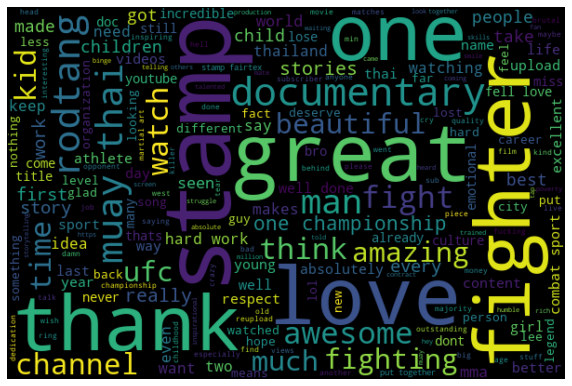

In [70]:
all_words_lem = ' '.join([word for word in r_and_s_df['text_string_lem']])
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [71]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

Text(0.5, 1.0, 'Top 15 Words')

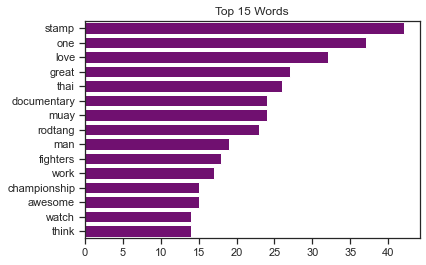

In [72]:
# Obtain top 10 words
top_15 = fd.most_common(15)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_15))


import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='purple');
plt.title("Top 15 Words")

In [73]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


r_and_s_df['polarity'] = r_and_s_df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
r_and_s_df.head(3)

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal,polarity
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True,"{'neg': 0.156, 'neu': 0.746, 'pos': 0.098, 'co..."
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True,"{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'comp..."


In [74]:
r_and_s_df = pd.concat(
    [r_and_s_df.drop(['polarity'], axis=1), 
     r_and_s_df['polarity'].apply(pd.Series)], axis=1)

In [75]:

# Create new variable with sentiment "neutral," "positive" and "negative"
r_and_s_df['sentiment'] = r_and_s_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral'  if x==0 else 'negative')



r_and_s_df.head(3)



,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,back youtube hell thanks waiting watch incredi...,2023-06-23 15:56:31+00:00,56,"[back, youtube, hell, thanks, waiting, watch, ...",back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,back youtube hell thanks waiting watch incredi...,True,0.156,0.746,0.098,-0.4019,negative
1,watching angela lee retirement,2023-09-30 10:04:17+00:00,0,"[watching, angela, lee, retirement]",watching angela lee retirement,watching angela lee retirement,watching angela lee retirement,True,0.000,1.000,0.000,0.0000,neutral
2,stamp manufactured lmao tin put contract absol...,2023-09-30 08:55:02+00:00,0,"[stamp, manufactured, lmao, tin, put, contract...",stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,stamp manufactured lmao tin put contract absol...,True,0.000,0.496,0.504,0.7269,positive


In [76]:
r_and_s_df.sentiment.value_counts()

positive    144
neutral      61
negative     44
Name: sentiment, dtype: int64

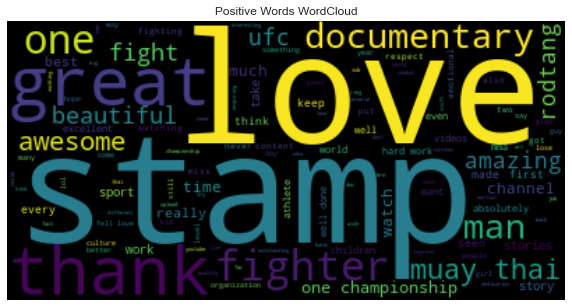

In [77]:
all_words_posi = ' '.join([text for text in r_and_s_df['text_string_lem'][r_and_s_df.sentiment == 'positive']])

wordcloud_posi = WordCloud(stopwords=stopwords, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation='bilinear')
plt.title("Positive Words WordCloud")
plt.axis('off');

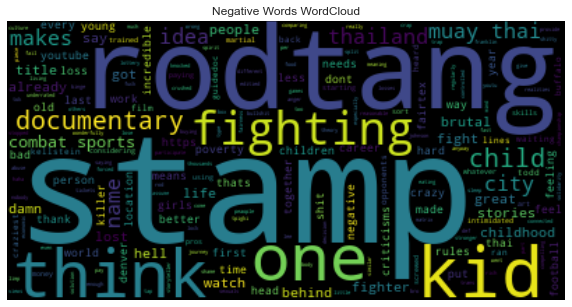

In [79]:
all_words_neg = ' '.join([text for text in r_and_s_df['text_string_lem'][r_and_s_df.sentiment == 'negative']])

wordcloud_neg = WordCloud(random_state=21, max_font_size=110).generate(all_words_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Words WordCloud")
plt.axis('off');

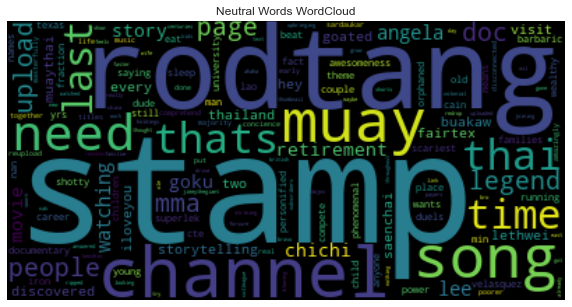

In [80]:
all_words_neu = ' '.join([text for text in r_and_s_df['text_string_lem'][r_and_s_df.sentiment == 'neutral']])

wordcloud_neu = WordCloud(random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title("Neutral Words WordCloud")
plt.axis('off');

Text(0.5, 1.0, 'Brutal World of Child Muay Thai Video Comments')

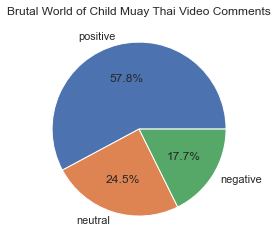

In [81]:
plt.pie(r_and_s_df['sentiment'].value_counts(), labels = r_and_s_df['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Brutal World of Child Muay Thai Video Comments')

Text(0.5, 1.0, 'Brutal World of Child Muay Thai Video Comments')

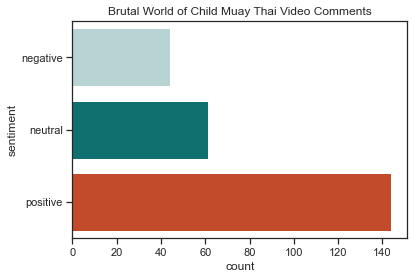

In [82]:
sns.countplot(y='sentiment', 
             data=r_and_s_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );
plt.title('Brutal World of Child Muay Thai Video Comments')

Text(0.5, 1.0, 'Like Count Sentiment')

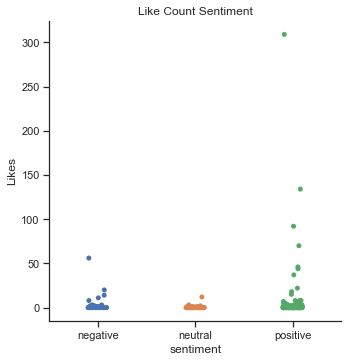

In [83]:
sns.catplot(data=r_and_s_df, x="sentiment", y="Likes")
plt.title("Like Count Sentiment")

In [85]:
rodtand_stamp_comm = r_and_s_df.loc[r_and_s_df.text_string_lem.str.contains(r'stamp|rodtang')]
rodtand_stamp_comm.sentiment.value_counts()


positive    24
negative    12
neutral      7
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Comments Containing Stamp or Rodtang Sentiment')

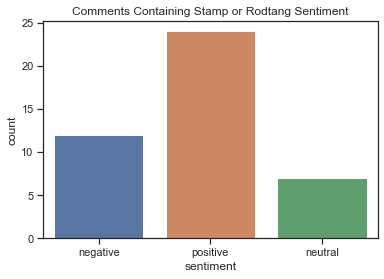

In [87]:
sns.countplot(data=rodtand_stamp_comm, x="sentiment", )
plt.title("Comments Containing Stamp or Rodtang Sentiment")

In [90]:
child_muay_thai_comm = r_and_s_df.loc[r_and_s_df.text_string_lem.str.contains(r'child|thai|kid')]
child_muay_thai_comm.sentiment.value_counts()


positive    22
negative    18
neutral      4
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Comments Containing Child or Muay Thai or Kid Sentiment')

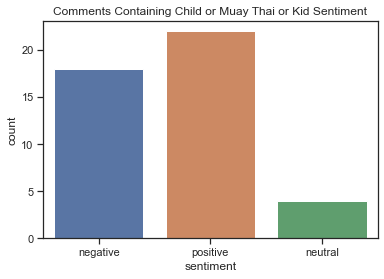

In [92]:
sns.countplot(data=child_muay_thai_comm, x="sentiment", )
plt.title("Comments Containing Child or Muay Thai or Kid Sentiment")

UFC Failure Video

In [123]:
ufc_failure_df.shape

(908, 3)

In [124]:
ufc_failure_df.nunique()

Comments    907
Date        908
Likes        40
dtype: int64

In [125]:
ufc_failure_df.Comments = ufc_failure_df.Comments.astype(str)
ufc_failure_df.Date = pd.to_datetime(ufc_failure_df.Date)

ufc_failure_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Comments  908 non-null    object             
 1   Date      908 non-null    datetime64[ns, UTC]
 2   Likes     908 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 21.4+ KB


Emojis

In [126]:
import emoji

emojis_str=''
for i in ufc_failure_df['Comments']:
    emojis_list = [c for c in i if c in emoji.distinct_emoji_list(i)]
    for element in emojis_list:
        emojis_str = emojis_str + element

len(emojis_str)

160

In [127]:

result={}
for i in set(emojis_str):
    result[i]=emojis_str.count(i)

result.items()


dict_items([('👮', 1), ('😤', 2), ('😱', 2), ('🌍', 1), ('🤍', 1), ('💥', 1), ('👌', 2), ('💯', 9), ('👏', 10), ('😮', 1), ('😢', 1), ('🤣', 8), ('😳', 2), ('🙏', 7), ('😊', 2), ('😘', 1), ('👎', 2), ('💦', 1), ('✌', 1), ('🤌', 1), ('🎉', 5), ('🦁', 2), ('👊', 1), ('🍻', 1), ('👉', 2), ('😑', 1), ('😭', 2), ('🔥', 2), ('😒', 1), ('💪', 1), ('👀', 4), ('😆', 5), ('🐐', 14), ('🤔', 2), ('🙌', 1), ('❤', 10), ('👑', 3), ('🥳', 1), ('🙄', 2), ('😎', 4), ('🤷', 1), ('💨', 1), ('😪', 1), ('😂', 27), ('👍', 8), ('🐣', 1), ('🌴', 1)])

In [128]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

values=[*final.values()]

In [129]:
emoji_df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})
emoji_df

,chars,num
0,👎,2
1,🦁,2
2,👉,2
3,😭,2
4,🔥,2
5,🤔,2
6,🙄,2
7,👑,3
8,👀,4
9,😎,4


In [130]:
px.bar(data_frame = emoji_df, x='chars',
y='num', color = 'num', template = 'plotly_dark', 
       title = 'Count of each emoji')

Remove punctuation, numbers, & special char

In [131]:
ufc_failure_df['Comments'] = ufc_failure_df['Comments'].str.replace("[^a-zA-Z#]", " ")
ufc_failure_df.head()

C:\Users\ANTHON~1\AppData\Local\Temp/ipykernel_13116/3974066242.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Comments,Date,Likes
0,Thinking of grabbing tickets for the Live Re...,2023-01-16 09:02:44+00:00,66
1,the UFC is starting to become a joke it start...,2023-09-29 06:01:54+00:00,0
2,Thanks,2023-09-27 04:46:21+00:00,0
3,Dam once you start going down the rabbit hole ...,2023-09-27 04:44:13+00:00,0
4,Dam this guy is a genius fighter I came here ...,2023-09-27 04:40:25+00:00,0


In [132]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['man', 'well', 'people','like', 'good', 'make', 'would', 'always', 'see', 'right', 'know', 'get', 'would', 'going', 'video'])

ufc_failure_df['Comments'] = ufc_failure_df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopwords)]))
ufc_failure_df.head()

,Comments,Date,Likes
0,Thinking grabbing tickets Live Rematch https b...,2023-01-16 09:02:44+00:00,66
1,UFC starting become joke started something ama...,2023-09-29 06:01:54+00:00,0
2,Thanks,2023-09-27 04:46:21+00:00,0
3,Dam start rabbit hole fighters stop many legen...,2023-09-27 04:44:13+00:00,0
4,Dam guy genius fighter came cuz watching Rodta...,2023-09-27 04:40:25+00:00,0


In [133]:
ufc_failure_df['Comments'] = ufc_failure_df['Comments'].apply(lambda x:x.lower())
ufc_failure_df.head()

,Comments,Date,Likes
0,thinking grabbing tickets live rematch https b...,2023-01-16 09:02:44+00:00,66
1,ufc starting become joke started something ama...,2023-09-29 06:01:54+00:00,0
2,thanks,2023-09-27 04:46:21+00:00,0
3,dam start rabbit hole fighters stop many legen...,2023-09-27 04:44:13+00:00,0
4,dam guy genius fighter came cuz watching rodta...,2023-09-27 04:40:25+00:00,0


In [134]:
from nltk.tokenize import RegexpTokenizer
regex = RegexpTokenizer(r'\w+')
ufc_failure_df['text_tokenize'] = ufc_failure_df['Comments'].apply(lambda x: regex.tokenize(x.lower()))
ufc_failure_df.head()

,Comments,Date,Likes,text_tokenize
0,thinking grabbing tickets live rematch https b...,2023-01-16 09:02:44+00:00,66,"[thinking, grabbing, tickets, live, rematch, h..."
1,ufc starting become joke started something ama...,2023-09-29 06:01:54+00:00,0,"[ufc, starting, become, joke, started, somethi..."
2,thanks,2023-09-27 04:46:21+00:00,0,[thanks]
3,dam start rabbit hole fighters stop many legen...,2023-09-27 04:44:13+00:00,0,"[dam, start, rabbit, hole, fighters, stop, man..."
4,dam guy genius fighter came cuz watching rodta...,2023-09-27 04:40:25+00:00,0,"[dam, guy, genius, fighter, came, cuz, watchin..."


In [135]:
#remove words with length less than 3
ufc_failure_df['text_string'] = ufc_failure_df['text_tokenize'].apply(lambda x: ' '.join([item for item in x if len(item) > 2 ]) )


In [136]:
# create a list of all words
ufc_failure_comments = ' '.join([text for text in ufc_failure_df['text_string']])
ufc_failure_comments

# tokenize all words
tokenized_words = nltk.tokenize.word_tokenize(ufc_failure_comments)

In [137]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'ufc': 284, 'one': 228, 'great': 113, 'fighters': 100, 'dana': 89, 'mouse': 81, 'mighty': 78, 'best': 76, 'fight': 74, 'fighter': 67, ...})

In [138]:
ufc_failure_df['text_string_fdist'] = ufc_failure_df['text_tokenize'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
ufc_failure_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist
0,thinking grabbing tickets live rematch https b...,2023-01-16 09:02:44+00:00,66,"[thinking, grabbing, tickets, live, rematch, h...",thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...
1,ufc starting become joke started something ama...,2023-09-29 06:01:54+00:00,0,"[ufc, starting, become, joke, started, somethi...",ufc starting become joke started something ama...,ufc starting become joke started something ama...
2,thanks,2023-09-27 04:46:21+00:00,0,[thanks],thanks,thanks
3,dam start rabbit hole fighters stop many legen...,2023-09-27 04:44:13+00:00,0,"[dam, start, rabbit, hole, fighters, stop, man...",dam start rabbit hole fighters stop many legen...,dam start rabbit hole fighters stop many legen...
4,dam guy genius fighter came cuz watching rodta...,2023-09-27 04:40:25+00:00,0,"[dam, guy, genius, fighter, came, cuz, watchin...",dam guy genius fighter came cuz watching rodta...,dam guy genius fighter came cuz watching rodta...


In [139]:
#lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

ufc_failure_df['text_string_lem'] = ufc_failure_df['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
ufc_failure_df['is_equal']= (ufc_failure_df['text_string_fdist']==ufc_failure_df['text_string_lem'])




ufc_failure_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,thinking grabbing tickets live rematch https b...,2023-01-16 09:02:44+00:00,66,"[thinking, grabbing, tickets, live, rematch, h...",thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...,True
1,ufc starting become joke started something ama...,2023-09-29 06:01:54+00:00,0,"[ufc, starting, become, joke, started, somethi...",ufc starting become joke started something ama...,ufc starting become joke started something ama...,ufc starting become joke started something ama...,True
2,thanks,2023-09-27 04:46:21+00:00,0,[thanks],thanks,thanks,thanks,True
3,dam start rabbit hole fighters stop many legen...,2023-09-27 04:44:13+00:00,0,"[dam, start, rabbit, hole, fighters, stop, man...",dam start rabbit hole fighters stop many legen...,dam start rabbit hole fighters stop many legen...,dam start rabbit hole fighters stop many legen...,True
4,dam guy genius fighter came cuz watching rodta...,2023-09-27 04:40:25+00:00,0,"[dam, guy, genius, fighter, came, cuz, watchin...",dam guy genius fighter came cuz watching rodta...,dam guy genius fighter came cuz watching rodta...,dam guy genius fighter came cuz watching rodta...,True


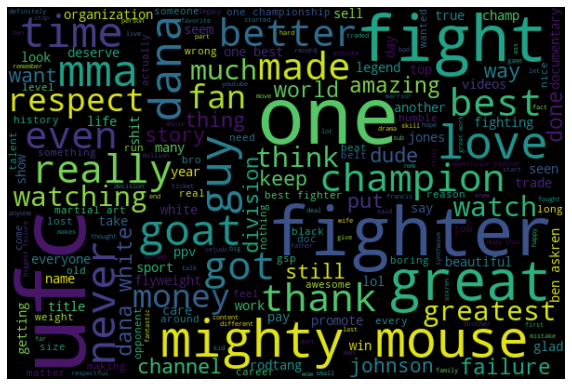

In [140]:
all_words_lem = ' '.join([word for word in ufc_failure_df['text_string_lem']])
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [141]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

Text(0.5, 1.0, 'Top 15 Words')

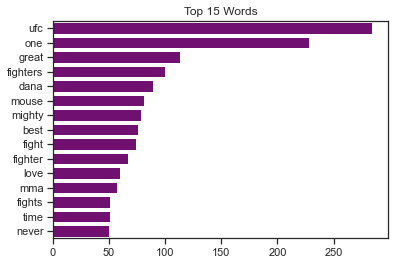

In [142]:
# Obtain top 10 words
top_15 = fd.most_common(15)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_15))


import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='purple');
plt.title("Top 15 Words")

In [143]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


ufc_failure_df['polarity'] = ufc_failure_df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
ufc_failure_df.head(3)

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal,polarity
0,thinking grabbing tickets live rematch https b...,2023-01-16 09:02:44+00:00,66,"[thinking, grabbing, tickets, live, rematch, h...",thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...,True,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp..."
1,ufc starting become joke started something ama...,2023-09-29 06:01:54+00:00,0,"[ufc, starting, become, joke, started, somethi...",ufc starting become joke started something ama...,ufc starting become joke started something ama...,ufc starting become joke started something ama...,True,"{'neg': 0.12, 'neu': 0.568, 'pos': 0.312, 'com..."
2,thanks,2023-09-27 04:46:21+00:00,0,[thanks],thanks,thanks,thanks,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [144]:
ufc_failure_df = pd.concat(
    [ufc_failure_df.drop(['polarity'], axis=1), 
     ufc_failure_df['polarity'].apply(pd.Series)], axis=1)

In [145]:

# Create new variable with sentiment "neutral," "positive" and "negative"
ufc_failure_df['sentiment'] = ufc_failure_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral'  if x==0 else 'negative')



ufc_failure_df.head(3)



,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,thinking grabbing tickets live rematch https b...,2023-01-16 09:02:44+00:00,66,"[thinking, grabbing, tickets, live, rematch, h...",thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...,thinking grabbing tickets live rematch https b...,True,0.00,0.799,0.201,0.7003,positive
1,ufc starting become joke started something ama...,2023-09-29 06:01:54+00:00,0,"[ufc, starting, become, joke, started, somethi...",ufc starting become joke started something ama...,ufc starting become joke started something ama...,ufc starting become joke started something ama...,True,0.12,0.568,0.312,0.8583,positive
2,thanks,2023-09-27 04:46:21+00:00,0,[thanks],thanks,thanks,thanks,True,0.00,0.000,1.000,0.4404,positive


In [146]:
ufc_failure_df.sentiment.value_counts()

positive    494
negative    238
neutral     176
Name: sentiment, dtype: int64

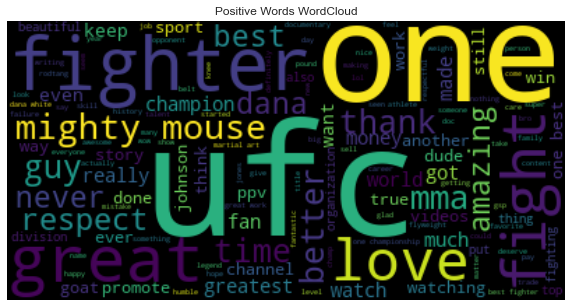

In [147]:
all_words_posi = ' '.join([text for text in ufc_failure_df['text_string_lem'][ufc_failure_df.sentiment == 'positive']])

wordcloud_posi = WordCloud(stopwords=stopwords, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation='bilinear')
plt.title("Positive Words WordCloud")
plt.axis('off');

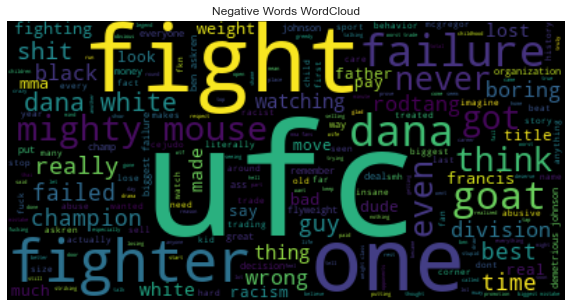

In [148]:
all_words_neg = ' '.join([text for text in ufc_failure_df['text_string_lem'][ufc_failure_df.sentiment == 'negative']])

wordcloud_neg = WordCloud(random_state=21, max_font_size=110).generate(all_words_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Words WordCloud")
plt.axis('off');

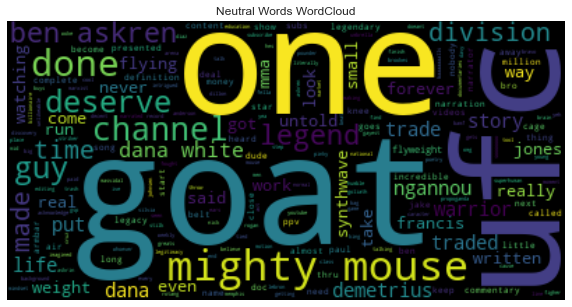

In [149]:
all_words_neu = ' '.join([text for text in ufc_failure_df['text_string_lem'][ufc_failure_df.sentiment == 'neutral']])

wordcloud_neu = WordCloud(random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title("Neutral Words WordCloud")
plt.axis('off');

Text(0.5, 1.0, 'Brutal World of Child Muay Thai Video Comments')

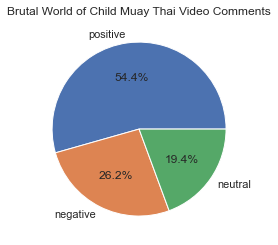

In [150]:
plt.pie(ufc_failure_df['sentiment'].value_counts(), labels =ufc_failure_df['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Brutal World of Child Muay Thai Video Comments')

Text(0.5, 1.0, 'Brutal World of Child Muay Thai Video Comments')

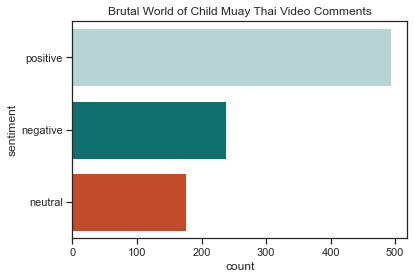

In [151]:
sns.countplot(y='sentiment', 
             data=ufc_failure_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );
plt.title('Brutal World of Child Muay Thai Video Comments')

Text(0.5, 1.0, 'Like Count Sentiment')

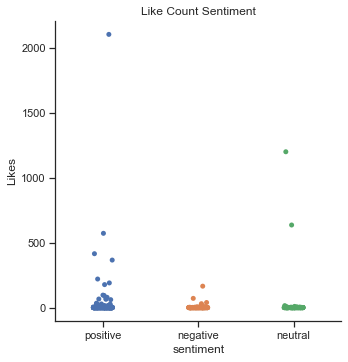

In [152]:
sns.catplot(data=ufc_failure_df, x="sentiment", y="Likes")
plt.title("Like Count Sentiment")

In [158]:
ufc_failure_comm = ufc_failure_df.loc[ufc_failure_df.text_string_lem.str.contains(r'mighty|mouse|demetruis')]
ufc_failure_comm.sentiment.value_counts()


positive    51
negative    19
neutral     14
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Comments Containing Mighty Mouse Sentiment')

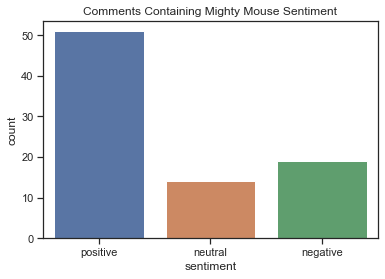

In [157]:
sns.countplot(data=ufc_failure_comm, x="sentiment", )
plt.title("Comments Containing Mighty Mouse Sentiment")

In [159]:
dana_ufc_comm = ufc_failure_df.loc[ufc_failure_df.text_string_lem.str.contains(r'dana|white|ufc')]
dana_ufc_comm.sentiment.value_counts()


positive    125
negative     97
neutral      24
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Comments Containing Dana White or UFC Sentiment')

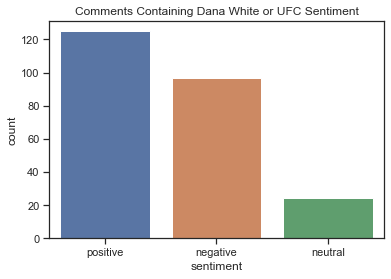

In [161]:
sns.countplot(data=dana_ufc_comm, x="sentiment", )
plt.title("Comments Containing Dana White or UFC Sentiment")

Chatri One doc

In [162]:
chatri_one_df.Comments = chatri_one_df.Comments.astype(str)
chatri_one_df.Date = pd.to_datetime(chatri_one_df.Date)

chatri_one_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Comments  3160 non-null   object             
 1   Date      3160 non-null   datetime64[ns, UTC]
 2   Likes     3160 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 74.2+ KB


In [163]:
import emoji

emojis_str=''
for i in chatri_one_df['Comments']:
    emojis_list = [c for c in i if c in emoji.distinct_emoji_list(i)]
    for element in emojis_list:
        emojis_str = emojis_str + element

len(emojis_str)

754

In [164]:

result={}
for i in set(emojis_str):
    result[i]=emojis_str.count(i)

result.items()


dict_items([('💕', 2), ('🤜', 1), ('🤩', 5), ('🤬', 1), ('🤦', 4), ('🥺', 3), ('💜', 1), ('🖤', 1), ('🤝', 1), ('😢', 14), ('💐', 1), ('🙏', 28), ('🎉', 26), ('🍩', 1), ('✊', 2), ('🤕', 3), ('💤', 1), ('🌶', 1), ('💚', 1), ('🏆', 4), ('🐐', 3), ('🙌', 10), ('👑', 6), ('\U0001fae1', 4), ('🌎', 1), ('🤮', 3), ('🌮', 2), ('🥈', 1), ('🤘', 1), ('👌', 9), ('😔', 1), ('😮', 12), ('🦴', 1), ('🙂', 3), ('🥇', 1), ('🍻', 1), ('🤢', 1), ('⭐', 8), ('🏀', 1), ('😎', 5), ('😬', 1), ('😂', 127), ('🦅', 1), ('😤', 6), ('🤞', 1), ('😉', 1), ('😯', 1), ('💵', 3), ('💥', 1), ('🥋', 4), ('🖥', 1), ('😍', 5), ('🎥', 1), ('👏', 42), ('🤯', 3), ('💫', 1), ('🤛', 1), ('🤣', 13), ('😊', 8), ('👎', 6), ('🥵', 1), ('😁', 1), ('💩', 4), ('🔥', 82), ('🍺', 1), ('💪', 7), ('👀', 1), ('🧢', 6), ('😴', 1), ('😞', 1), ('🕊', 1), ('💣', 1), ('🤡', 4), ('🥱', 1), ('💙', 1), ('😅', 39), ('✨', 5), ('🌍', 1), ('🏅', 1), ('💯', 24), ('\U0001f979', 3), ('💀', 5), ('😀', 1), ('👆', 1), ('💰', 2), ('✌', 1), ('👊', 3), ('🤟', 1), ('👇', 1), ('☕', 1), ('🌭', 1), ('😭', 9), ('😒', 2), ('😆', 2), ('🌞', 1), ('🥳', 1)

In [165]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

values=[*final.values()]

In [166]:
emoji_df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})
emoji_df

,chars,num
0,👎,6
1,🧢,6
2,💪,7
3,⭐,8
4,😊,8
5,👌,9
6,😭,9
7,🙌,10
8,👍,11
9,😮,12


In [167]:
px.bar(data_frame = emoji_df, x='chars',
y='num', color = 'num', template = 'plotly_dark', 
       title = 'Count of each emoji')

In [168]:
chatri_one_df['Comments'] = chatri_one_df['Comments'].str.replace("[^a-zA-Z#]", " ")
chatri_one_df.head()

C:\Users\ANTHON~1\AppData\Local\Temp/ipykernel_13116/4103217448.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Comments,Date,Likes
0,I love it a true martial artist seeming to bas...,2023-09-30 18:09:50+00:00,0
1,Love this guy class all the way,2023-09-30 17:14:22+00:00,0
2,They are selling fights we are unleashing her...,2023-09-30 14:32:13+00:00,0
3,UFC is overrated,2023-09-30 03:53:16+00:00,0
4,Screw Dana,2023-09-30 03:51:03+00:00,0


In [169]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['man', 'well', 'people','like', 'good', 'make', 'would', 'always', 'see', 'right', 'know', 'get', 'would', 'going', 'video'])

chatri_one_df['Comments'] = chatri_one_df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopwords)]))
chatri_one_df.head()

,Comments,Date,Likes
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0
1,Love guy class way,2023-09-30 17:14:22+00:00,0
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0
3,UFC overrated,2023-09-30 03:53:16+00:00,0
4,Screw Dana,2023-09-30 03:51:03+00:00,0


In [170]:
chatri_one_df['Comments'] = chatri_one_df['Comments'].apply(lambda x:x.lower())
chatri_one_df.head()

,Comments,Date,Likes
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0
1,love guy class way,2023-09-30 17:14:22+00:00,0
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0
3,ufc overrated,2023-09-30 03:53:16+00:00,0
4,screw dana,2023-09-30 03:51:03+00:00,0


In [171]:
from nltk.tokenize import RegexpTokenizer
regex = RegexpTokenizer(r'\w+')
chatri_one_df['text_tokenize'] = chatri_one_df['Comments'].apply(lambda x: regex.tokenize(x.lower()))
chatri_one_df.head()

,Comments,Date,Likes,text_tokenize
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0,"[love, true, martial, artist, seeming, base, f..."
1,love guy class way,2023-09-30 17:14:22+00:00,0,"[love, guy, class, way]"
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0,"[selling, fights, unleashing, heroes, boooooom..."
3,ufc overrated,2023-09-30 03:53:16+00:00,0,"[ufc, overrated]"
4,screw dana,2023-09-30 03:51:03+00:00,0,"[screw, dana]"


In [172]:
#remove words with length less than 3
chatri_one_df['text_string'] = chatri_one_df['text_tokenize'].apply(lambda x: ' '.join([item for item in x if len(item) > 2 ]) )


In [173]:
# create a list of all words
chatri_one_comments = ' '.join([text for text in chatri_one_df['text_string']])
chatri_one_comments

# tokenize all words
tokenized_words = nltk.tokenize.word_tokenize(chatri_one_comments)

In [174]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'one': 1080, 'ufc': 886, 'dana': 441, 'fighters': 330, 'story': 286, 'chatri': 260, 'great': 250, 'love': 217, 'patrick': 203, 'mma': 195, ...})

In [175]:
chatri_one_df['text_string_fdist'] = chatri_one_df['text_tokenize'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
chatri_one_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0,"[love, true, martial, artist, seeming, base, f...",love true martial artist seeming base fight or...,love true martial artist seeming base fight or...
1,love guy class way,2023-09-30 17:14:22+00:00,0,"[love, guy, class, way]",love guy class way,love guy class way
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0,"[selling, fights, unleashing, heroes, boooooom...",selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm
3,ufc overrated,2023-09-30 03:53:16+00:00,0,"[ufc, overrated]",ufc overrated,ufc overrated
4,screw dana,2023-09-30 03:51:03+00:00,0,"[screw, dana]",screw dana,screw dana


In [176]:
#lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

chatri_one_df['text_string_lem'] = chatri_one_df['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
chatri_one_df['is_equal']= (chatri_one_df['text_string_fdist']==chatri_one_df['text_string_lem'])




chatri_one_df.head()

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0,"[love, true, martial, artist, seeming, base, f...",love true martial artist seeming base fight or...,love true martial artist seeming base fight or...,love true martial artist seeming base fight or...,True
1,love guy class way,2023-09-30 17:14:22+00:00,0,"[love, guy, class, way]",love guy class way,love guy class way,love guy class way,True
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0,"[selling, fights, unleashing, heroes, boooooom...",selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm,True
3,ufc overrated,2023-09-30 03:53:16+00:00,0,"[ufc, overrated]",ufc overrated,ufc overrated,ufc overrated,True
4,screw dana,2023-09-30 03:51:03+00:00,0,"[screw, dana]",screw dana,screw dana,screw dana,True


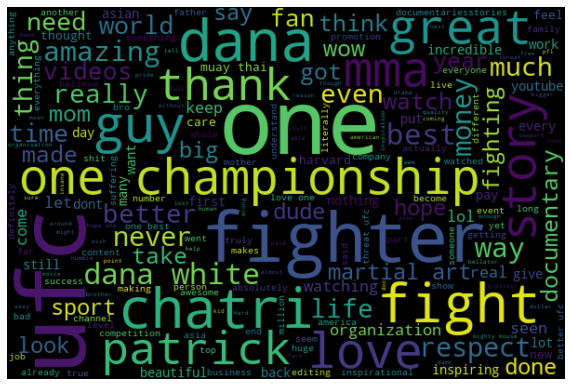

In [177]:
all_words_lem = ' '.join([word for word in chatri_one_df['text_string_lem']])
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [178]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

Text(0.5, 1.0, 'Top 15 Words')

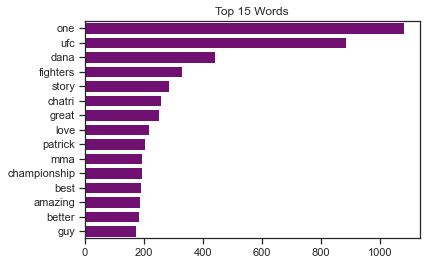

In [179]:
# Obtain top 10 words
top_15 = fd.most_common(15)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_15))


import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='purple');
plt.title("Top 15 Words")

In [182]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


chatri_one_df['polarity'] = chatri_one_df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
chatri_one_df.head(3)

,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal,polarity
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0,"[love, true, martial, artist, seeming, base, f...",love true martial artist seeming base fight or...,love true martial artist seeming base fight or...,love true martial artist seeming base fight or...,True,"{'neg': 0.138, 'neu': 0.37, 'pos': 0.492, 'com..."
1,love guy class way,2023-09-30 17:14:22+00:00,0,"[love, guy, class, way]",love guy class way,love guy class way,love guy class way,True,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp..."
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0,"[selling, fights, unleashing, heroes, boooooom...",selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm,True,"{'neg': 0.3, 'neu': 0.333, 'pos': 0.367, 'comp..."


In [183]:
chatri_one_df = pd.concat(
    [chatri_one_df.drop(['polarity'], axis=1), 
     chatri_one_df['polarity'].apply(pd.Series)], axis=1)

In [184]:

# Create new variable with sentiment "neutral," "positive" and "negative"
chatri_one_df['sentiment'] = chatri_one_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral'  if x==0 else 'negative')



chatri_one_df.head(3)



,Comments,Date,Likes,text_tokenize,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,love true martial artist seeming base fight or...,2023-09-30 18:09:50+00:00,0,"[love, true, martial, artist, seeming, base, f...",love true martial artist seeming base fight or...,love true martial artist seeming base fight or...,love true martial artist seeming base fight or...,True,0.138,0.370,0.492,0.9451,positive
1,love guy class way,2023-09-30 17:14:22+00:00,0,"[love, guy, class, way]",love guy class way,love guy class way,love guy class way,True,0.000,0.417,0.583,0.6369,positive
2,selling fights unleashing heroes boooooommmm,2023-09-30 14:32:13+00:00,0,"[selling, fights, unleashing, heroes, boooooom...",selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm,selling fights unleashing heroes boooooommmm,True,0.300,0.333,0.367,0.1531,positive


In [185]:
chatri_one_df.sentiment.value_counts()

positive    1838
neutral      706
negative     616
Name: sentiment, dtype: int64

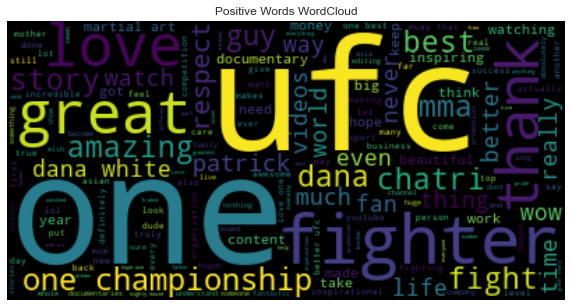

In [186]:
all_words_posi = ' '.join([text for text in chatri_one_df['text_string_lem'][chatri_one_df.sentiment == 'positive']])

wordcloud_posi = WordCloud(stopwords=stopwords, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation='bilinear')
plt.title("Positive Words WordCloud")
plt.axis('off');

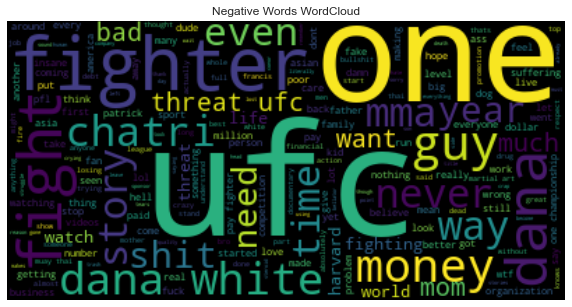

In [187]:
all_words_neg = ' '.join([text for text in chatri_one_df['text_string_lem'][chatri_one_df.sentiment == 'negative']])

wordcloud_neg = WordCloud(random_state=21, max_font_size=110).generate(all_words_neg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Words WordCloud")
plt.axis('off');

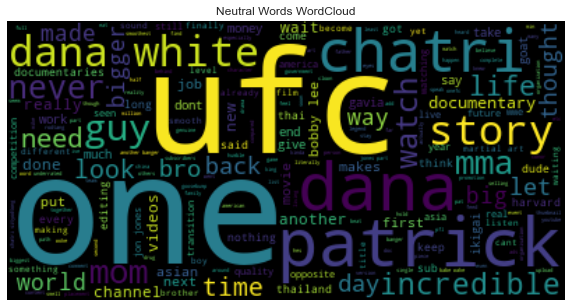

In [188]:
all_words_neu = ' '.join([text for text in chatri_one_df['text_string_lem'][chatri_one_df.sentiment == 'neutral']])

wordcloud_neu = WordCloud(random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title("Neutral Words WordCloud")
plt.axis('off');

Text(0.5, 1.0, 'Chatri Doc Video Comments')

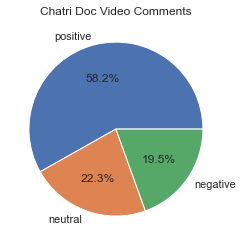

In [194]:
plt.pie(chatri_one_df['sentiment'].value_counts(), labels =chatri_one_df['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Chatri Doc Video Comments')

Text(0.5, 1.0, 'Chatri Doc Video Comments')

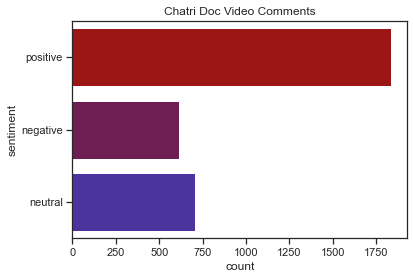

In [207]:
sns.countplot(y='sentiment', 
             data=chatri_one_df, 
             palette=["#b30000", "#7c1158", "#4421af"], order=["positive", "negative", "neutral"]
             );
plt.title('Chatri Doc Video Comments')

Text(0.5, 1.0, 'Like Count Sentiment')

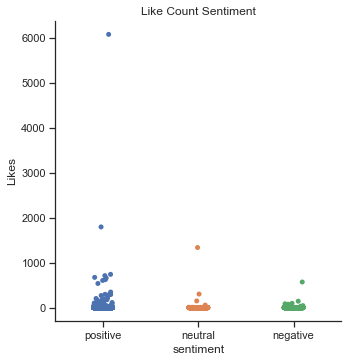

In [192]:
sns.catplot(data=chatri_one_df, x="sentiment", y="Likes")
plt.title("Like Count Sentiment")

In [195]:
chatri_one_comm = chatri_one_df.loc[chatri_one_df.text_string_lem.str.contains(r'chatri|one|championship')]
chatri_one_comm.sentiment.value_counts()


positive    791
negative    230
neutral     150
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Chatri Doc Comments Containing Chatri or One Championship Sentiment')

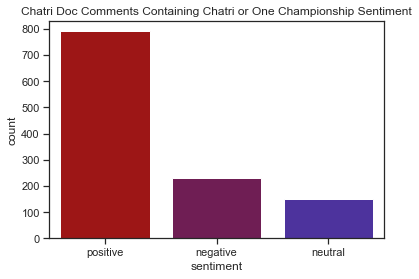

In [209]:
sns.countplot(data=chatri_one_comm, x="sentiment", palette=["#b30000", "#7c1158", "#4421af"], order=["positive", "negative", "neutral"])
plt.title("Chatri Doc Comments Containing Chatri or One Championship Sentiment")

In [197]:
chatri_one_and_dana_comm = chatri_one_df.loc[chatri_one_df.text_string_lem.str.contains(r'dana|white|ufc')]
chatri_one_and_dana_comm.sentiment.value_counts()


positive    500
negative    251
neutral     145
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Chatri Doc Comments Containing Dana White or UFC Sentiment')

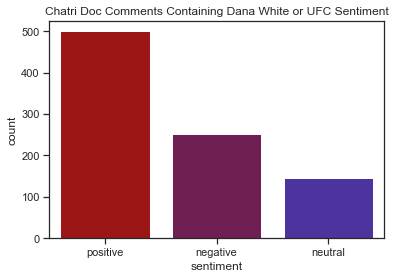

In [208]:
sns.countplot(data=chatri_one_and_dana_comm, x="sentiment", palette=["#b30000", "#7c1158", "#4421af"], order=["positive", "negative", "neutral"])
plt.title("Chatri Doc Comments Containing Dana White or UFC Sentiment")

In [214]:
chatri_doc_neg = chatri_one_df.loc[chatri_one_df.sentiment == 'negative']
all_neg_words_lem = ' '.join([word for word in chatri_doc_neg['text_string_lem']])
all_neg_words_lem

'screw dana think big factor ufc went full greedy limiting viewership ppv pay pair bad parents never gave matter odds gives fuck everyone dana jealous music documentary chatri threat ufc competition sure threat way big statement bud saudi real threat one much fun watch brutal fights many fighters watched first time one weekend friday night bangkok insane guys even credentialed sanction fights mma trash industry world nothing dumbasses money nice something better coming scumbag greedy ufc seen videos childhood families tough times nothing dude unique ufc popular dana white refuses bend woke mob thats moment betrays ufc every league chatri guy really saw problems muay thai especially fighters still poor even fights careers fixed muay thai another level thai thought really changed lots life lots respect guy fire dana white asap stuck early chatri hope capture ufc stupid dana dana evil care fighters dana supports rude fighters drug addicts fighyers chatri better ufc sponsor section confusi

Text(0.5, 1.0, 'Top 15 Words')

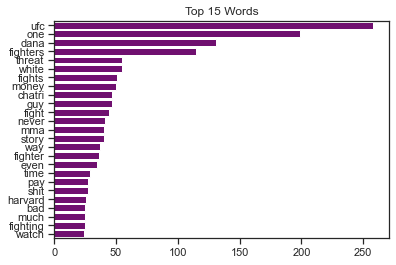

In [216]:
all_neg_words_lem = ' '.join([word for word in chatri_doc_neg['text_string_lem']])
neg_words = nltk.word_tokenize(all_neg_words_lem)
neg_fd = FreqDist(neg_words)

neg_top_chatri = neg_fd.most_common(25)
# Create pandas series to make plotting easier
fdist = pd.Series(dict(neg_top_chatri))


import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='purple');
plt.title("Top 15 Words")

In [217]:
chatri_doc_pos = chatri_one_df.loc[chatri_one_df.sentiment == 'positive']
all_pos_words_lem = ' '.join([word for word in chatri_doc_pos['text_string_lem']])
all_pos_words_lem

'love true martial artist seeming base fight organization around fighter means new wwe heels storylines inflated egos simply true honest truth brutal clarity comes martial artist one love love guy class way selling fights unleashing heroes boooooommmm really respect fan one last years appreciate professionalism respect fighters display beautiful gavia thank much world better place chatri heard unique one championship happy fighters respecting much media bullshit west relief never thought come world hes respectable hes great work mom trying speak english hilarious tries say philosophical best dana white terrible mma industry honor respect art fighters god hope one championship absorbs ufc also hope dana white ends gutter somewhere one champion last fighter standing reality show believe beautiful thank patrick champion incogni business lol covered sold entertaining captivating inspirational stopped watching ufc hrs ago stand dana white anymore pompous entitled douche avoids paying fighte

Text(0.5, 1.0, 'Top 15 Words')

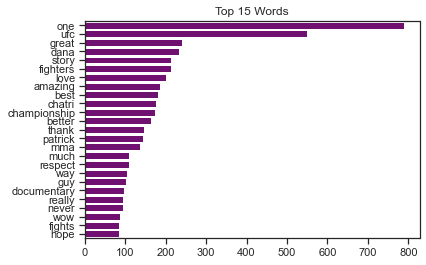

In [218]:
all_pos_words_lem = ' '.join([word for word in chatri_doc_pos['text_string_lem']])
pos_words = nltk.word_tokenize(all_pos_words_lem)
pos_fd = FreqDist(pos_words)

pos_top_chatri = pos_fd.most_common(25)
# Create pandas series to make plotting easier
fdist = pd.Series(dict(pos_top_chatri))


import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='purple');
plt.title("Top 15 Words")

In [226]:
import gensim
import collections
# Tokenize and lemmatize


dict_text = pd.Series([y for x in chatri_one_df['text_string_lem'].values.flatten() for y in x.split()]).value_counts()


In [239]:
from gensim import corpora, models
from gensim.utils import simple_preprocess



data = chatri_one_df.text_tokenize.values.tolist()
data_words = [simple_preprocess(str(sent)) for sent in data][0]
data_words

['love',
 'true',
 'martial',
 'artist',
 'seeming',
 'base',
 'fight',
 'organization',
 'around',
 'fighter',
 'means',
 'new',
 'wwe',
 'heels',
 'storylines',
 'inflated',
 'egos',
 'simply',
 'true',
 'honest',
 'truth',
 'brutal',
 'clarity',
 'comes',
 'martial',
 'artist',
 'one',
 'love']

In [242]:
from gensim import corpora, models
from gensim.utils import simple_preprocess



data = ufc_failure_df.text_string_lem.values.tolist()
data_words = [simple_preprocess(str(sent)) for sent in data][0]
data_words
#TODO NOT WORKING NEED TO USE LAMDA FUNCTION TO GET ALL WORDS IN DATA_WORDS

['thinking',
 'grabbing',
 'tickets',
 'live',
 'rematch',
 'https',
 'bit',
 'ofn',
 'moraes',
 'iii',
 'thanks',
 'watching',
 'boys',
 'consider',
 'supporting',
 'channel',
 'becoming',
 'member',
 'hitting',
 'patreon',
 'https',
 'www',
 'patreon',
 'com',
 'mmaacademic']